In [ ]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
df = pd.read_excel("./데이터자료/Join_data.xlsx", index_col = 0)    
df = df.set_index("DateTime")

# 대비 계산
df['대비_swapbasis_1Y'] = df['1Y_베이시스']-df['1Y_베이시스'].shift(1)
df['대비_swapbasis_2Y'] = df['2Y_베이시스']-df['2Y_베이시스'].shift(1)
df['대비_swapbasis_3Y'] = df['3Y_베이시스']-df['3Y_베이시스'].shift(1)
df['대비_swapbasis_5Y'] = df['5Y_베이시스']-df['5Y_베이시스'].shift(1)
df['대비_swapbasis_10Y'] = df['10Y_베이시스']-df['10Y_베이시스'].shift(1)

df['대비_국고_1Y'] = df['국고1년']-df['국고1년'].shift(1)
df['대비_국고_3Y'] = df['국고3년']-df['국고3년'].shift(1)
df['대비_국고_5Y'] = df['국고5년']-df['국고5년'].shift(1)
df['대비_국고_10Y'] = df['국고10년']-df['국고10년'].shift(1)

df['대비_통안_1Y'] = df['통안364일']-df['통안364일'].shift(1)
df['대비_통안_2Y'] = df['통안2년']-df['통안2년'].shift(1)

df['스왑포인트_1M'] = df['M1_스왑포인트']/100 
df['전일종가_ex'] = df['종가_ex'].shift(1)
df['종가_NDF_차이'] = df['전일종가_ex'] - df['Mid_ndf']

In [ ]:
df.rename({ '1Y_전일비_irs' : '대비_irs_1Y', '2Y_전일비_irs' :'대비_irs_2Y','3Y_전일비_irs':'대비_irs_3Y', '5Y_전일비_irs' : '대비_irs_5Y', '10Y_전일비_irs' : '대비_irs_10Y',
           '1Y_전일비_crs' :'대비_crs_1Y', '2Y_전일비_crs' :'대비_crs_2Y','3Y_전일비_crs' : '대비_crs_3Y', '5Y_전일비_crs' :'대비_crs_5Y', '10Y_전일비_crs' : '대비_crs_10Y','전일비_ndf' :'대비_ndf'}, axis=1, inplace=True)


# 필요한 칼럼만 추출
df_1 = df[['대비_irs_1Y','대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           '종가_ex', '종가_NDF_차이' ]]  

# 결측치 제거
df_1 = df_1.dropna()    

In [ ]:
df_1.columns

Index(['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
       '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y',
       '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y',
       '대비_swapbasis_5Y', '대비_swapbasis_10Y', '대비_국고_1Y', '대비_국고_3Y',
       '대비_국고_5Y', '대비_국고_10Y', '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M',
       '전일종가_ex', '종가_ex', '종가_NDF_차이'],
      dtype='object')

In [ ]:
x = df_1[[ '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           ]]
y = df_1["종가_ex"]

x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

,대비_swapbasis_1Y,대비_swapbasis_2Y,대비_swapbasis_3Y,대비_swapbasis_5Y,대비_swapbasis_10Y,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y,대비_ndf,스왑포인트_1M,전일종가_ex
DateTime,,,,,,,,,,,,,,
2012-08-02,0.348741,1.544080,1.437744,1.627899,1.488363,-1.698057,-0.646622,-1.079749,-1.027569,-0.325920,-0.625160,0.294493,1.909409,-0.149841
2012-08-03,0.348741,0.286831,0.157058,-0.910410,-2.158344,-1.132651,-0.323869,-1.890219,-1.798403,-0.217574,-0.125723,0.687227,1.818881,-0.056232
2012-08-06,-0.350946,-0.873707,-0.803456,-1.091718,-0.832269,0.563566,0.160261,0.000879,0.000209,0.107465,0.123996,-1.669177,1.818881,-0.000426
2012-08-07,0.173819,0.286831,-0.003027,-1.454333,-1.661066,-0.567245,-0.001116,0.000879,0.000209,-0.109228,-0.125723,0.076307,1.909409,-0.104837
2012-08-08,-0.001103,-0.390150,-0.323199,-0.729102,-1.163788,-0.567245,-0.323869,-0.539435,-0.513680,-0.109228,-0.125723,0.207219,1.818881,-0.108437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-0.700790,-0.196727,-0.003027,-0.366487,-0.003472,-1.132651,-0.969375,-1.890219,-2.312292,-0.109228,-0.625160,0.573770,-0.896960,3.207485
2022-07-26,0.348741,-0.196727,-0.003027,0.177437,0.162288,0.563566,-0.485246,-0.539435,-0.770625,0.107465,-0.000863,0.189764,-0.987488,3.220086
2022-07-27,0.348741,0.770388,0.797401,0.902668,0.825326,-0.001839,-0.485246,-1.349905,-1.541458,0.215812,-0.125723,-0.098241,-0.851696,3.110275


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

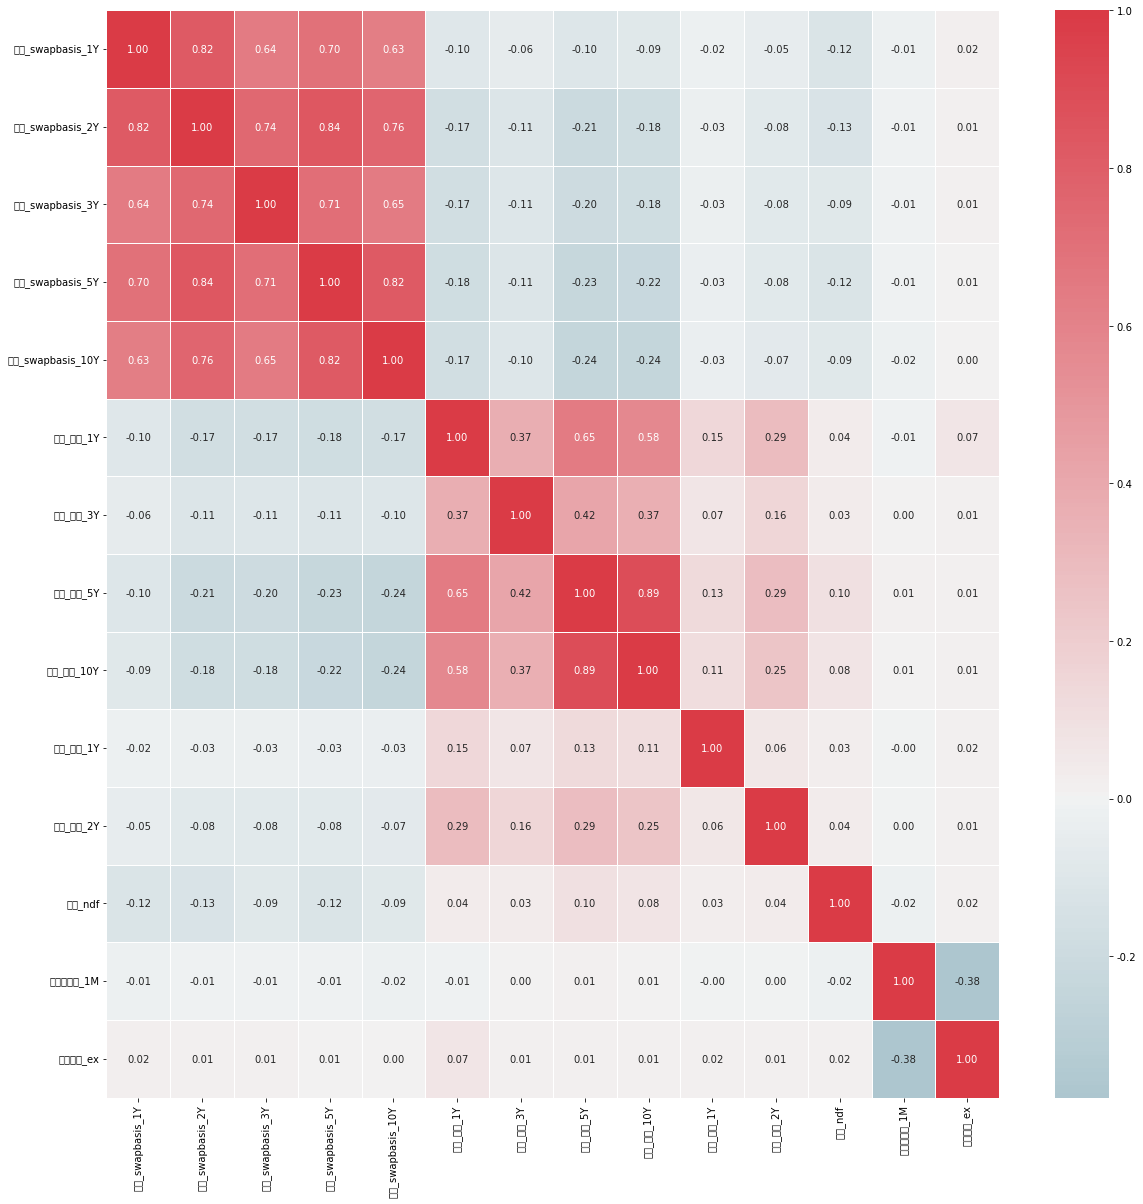

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor           Feature
0     3.153834   대비_swapbasis_1Y
1     5.916508   대비_swapbasis_2Y
2     2.407984   대비_swapbasis_3Y
3     4.771250   대비_swapbasis_5Y
4     3.272909  대비_swapbasis_10Y
5     1.834081          대비_국고_1Y
6     1.244151          대비_국고_3Y
7     5.825792          대비_국고_5Y
8     4.885539         대비_국고_10Y
9     1.024869          대비_통안_1Y
10    1.114144          대비_통안_2Y
11    1.028354            대비_ndf
12    1.169030          스왑포인트_1M
13    1.178170           전일종가_ex


In [ ]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.183e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:38:31   Log-Likelihood:                -7425.6
No. Observations:                2459   AIC:                         1.488e+04
Df Residuals:                    2444   BIC:                         1.497e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.100   1.13e+04      0.000    1134.697    1135.091
대비_swapbasis_1Y     -1.2074      0.178     -6.780      0.000      -1.557      -0.858
대비_swapbasis_2Y      0.0163      0.244      0.067      0.947      -0.462       0.495
대비_swapbasis_3Y     -0.2017      0.156     -1.296      0.195      -0.507       0.103
대비_swapbasis_5Y      0.2647      0.219      1.209      0.227      -0.165       0.694
대비_swapbasis_10Y     0.1543      0.181      0.851      0.395      -0.201       0.510
대비_국고_1Y             0.0659      0.136      0.485      0.628      -0.200       0.332
대비_국고_3Y            -0.2900      0.112     -2.593      0.010      -0.509      -0.071
대비_국고_5Y             0.2435      0.242      1.006      0.314      -0.231       0.718
대비_국고_10Y           -0.1366      0.222     -0.616      0.538      -0.571       0.298
대비_통안_1Y            -0.0474      0.102     -0.467      0.640      -0.246       0.152
대비_통안_2Y             0.0541      0.106      0.511      0.609      -0.153       0.262
대비_ndf               2.4725      0.102     24.316      0.000       2.273       2.672
스왑포인트_1M            -0.1115      0.108     -1.029      0.304      -0.324       0.101
전일종가_ex             55.2914      0.109    508.022      0.000      55.078      55.505
==============================================================================
Omnibus:                       69.168   Durbin-Watson:                   2.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.468
Skew:                           0.067   Prob(JB):                     1.17e-36
Kurtosis:                       4.264   Cond. No.                         6.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_scaled.drop(['대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.778e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:38:31   Log-Likelihood:                -7426.9
No. Observations:                2459   AIC:                         1.488e+04
Df Residuals:                    2447   BIC:                         1.495e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.100   1.13e+04      0.000    1134.697    1135.090
대비_swapbasis_1Y     -1.1953      0.130     -9.194      0.000      -1.450      -0.940
대비_swapbasis_10Y     0.2443      0.133      1.839      0.066      -0.016       0.505
대비_국고_1Y             0.0674      0.136      0.497      0.619      -0.199       0.333
대비_국고_3Y            -0.2890      0.112     -2.586      0.010      -0.508      -0.070
대비_국고_5Y             0.2422      0.242      1.002      0.317      -0.232       0.716
대비_국고_10Y           -0.1386      0.222     -0.626      0.532      -0.573       0.296
대비_통안_1Y            -0.0479      0.102     -0.472      0.637      -0.247       0.151
대비_통안_2Y             0.0547      0.106      0.517      0.605      -0.153       0.262
대비_ndf               2.4662      0.101     24.304      0.000       2.267       2.665
스왑포인트_1M            -0.1115      0.108     -1.029      0.304      -0.324       0.101
전일종가_ex             55.2904      0.109    508.066      0.000      55.077      55.504
==============================================================================
Omnibus:                       69.217   Durbin-Watson:                   2.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.085
Skew:                           0.064   Prob(JB):                     8.61e-37
Kurtosis:                       4.267   Cond. No.                         5.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_scaled.drop(['대비_통안_1Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor           Feature
0    1.681123   대비_swapbasis_1Y
1    1.756447  대비_swapbasis_10Y
2    1.816773          대비_국고_1Y
3    1.242189          대비_국고_3Y
4    5.810322          대비_국고_5Y
5    4.881160         대비_국고_10Y
6    1.113401          대비_통안_2Y
7    1.024010            대비_ndf
8    1.168986          스왑포인트_1M
9    1.177939           전일종가_ex


In [ ]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.057e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:38:32   Log-Likelihood:                -7427.1
No. Observations:                2459   AIC:                         1.488e+04
Df Residuals:                    2448   BIC:                         1.494e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.100   1.13e+04      0.000    1134.697    1135.090
대비_swapbasis_1Y     -1.1952      0.130     -9.195      0.000      -1.450      -0.940
대비_swapbasis_10Y     0.2441      0.133      1.837      0.066      -0.016       0.505
대비_국고_1Y             0.0621      0.135      0.460      0.646      -0.203       0.327
대비_국고_3Y            -0.2893      0.112     -2.590      0.010      -0.508      -0.070
대비_국고_5Y             0.2397      0.242      0.992      0.321      -0.234       0.714
대비_국고_10Y           -0.1385      0.221     -0.625      0.532      -0.573       0.296
대비_통안_2Y             0.0542      0.106      0.512      0.609      -0.153       0.262
대비_ndf               2.4655      0.101     24.304      0.000       2.267       2.664
스왑포인트_1M            -0.1117      0.108     -1.031      0.303      -0.324       0.101
전일종가_ex             55.2899      0.109    508.164      0.000      55.077      55.503
==============================================================================
Omnibus:                       69.069   Durbin-Watson:                   2.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.624
Skew:                           0.064   Prob(JB):                     1.08e-36
Kurtosis:                       4.265   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_scaled.drop(['대비_통안_2Y','대비_국고_1Y' ], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.823e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:38:32   Log-Likelihood:                -7427.3
No. Observations:                2459   AIC:                         1.487e+04
Df Residuals:                    2450   BIC:                         1.492e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.100   1.13e+04      0.000    1134.697    1135.090
대비_swapbasis_1Y     -1.1990      0.130     -9.235      0.000      -1.454      -0.944
대비_swapbasis_10Y     0.2456      0.133      1.849      0.065      -0.015       0.506
대비_국고_3Y            -0.2793      0.110     -2.528      0.012      -0.496      -0.063
대비_국고_5Y             0.2923      0.227      1.287      0.198      -0.153       0.738
대비_국고_10Y           -0.1396      0.221     -0.630      0.529      -0.574       0.295
대비_ndf               2.4643      0.101     24.318      0.000       2.266       2.663
스왑포인트_1M            -0.1109      0.108     -1.024      0.306      -0.323       0.102
전일종가_ex             55.2947      0.108    510.260      0.000      55.082      55.507
==============================================================================
Omnibus:                       68.090   Durbin-Watson:                   2.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.982
Skew:                           0.056   Prob(JB):                     4.06e-36
Kurtosis:                       4.256   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_scaled.drop(['대비_국고_10Y', '스왑포인트_1M'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 5.099e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:38:32   Log-Likelihood:                -7428.0
No. Observations:                2459   AIC:                         1.487e+04
Df Residuals:                    2452   BIC:                         1.491e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.100   1.13e+04      0.000    1134.697    1135.090
대비_swapbasis_1Y     -1.2037      0.130     -9.285      0.000      -1.458      -0.949
대비_swapbasis_10Y     0.2537      0.132      1.916      0.055      -0.006       0.513
대비_국고_3Y            -0.2784      0.110     -2.521      0.012      -0.495      -0.062
대비_국고_5Y             0.1672      0.114      1.469      0.142      -0.056       0.390
대비_ndf               2.4672      0.101     24.359      0.000       2.269       2.666
전일종가_ex             55.3366      0.100    551.906      0.000      55.140      55.533
==============================================================================
Omnibus:                       67.735   Durbin-Watson:                   2.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.023
Skew:                           0.053   Prob(JB):                     6.56e-36
Kurtosis:                       4.253   Cond. No.                         2.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_scaled.drop(['대비_swapbasis_10Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 6.112e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:38:33   Log-Likelihood:                -7429.9
No. Observations:                2459   AIC:                         1.487e+04
Df Residuals:                    2453   BIC:                         1.491e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1134.8939      0.100   1.13e+04      0.000    1134.697    1135.090
대비_swapbasis_1Y    -1.0488      0.101    -10.341      0.000      -1.248      -0.850
대비_국고_3Y           -0.2759      0.111     -2.497      0.013      -0.493      -0.059
대비_국고_5Y            0.1208      0.111      1.086      0.278      -0.097       0.339
대비_ndf              2.4669      0.101     24.343      0.000       2.268       2.666
전일종가_ex            55.3346      0.100    551.615      0.000      55.138      55.531
==============================================================================
Omnibus:                       70.898   Durbin-Watson:                   2.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.081
Skew:                           0.053   Prob(JB):                     1.58e-38
Kurtosis:                       4.299   Cond. No.                         1.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_scaled = pd.concat([x_scaled,y], axis=1)
df_scaled

,대비_swapbasis_1Y,대비_국고_3Y,대비_국고_5Y,대비_ndf,전일종가_ex,종가_ex
DateTime,,,,,,
2012-08-02,0.348741,-0.646622,-1.079749,0.294493,-0.149841,1131.7
2012-08-03,0.348741,-0.323869,-1.890219,0.687227,-0.056232,1134.8
2012-08-06,-0.350946,0.160261,0.000879,-1.669177,-0.000426,1129.0
2012-08-07,0.173819,-0.001116,0.000879,0.076307,-0.104837,1128.8
2012-08-08,-0.001103,-0.323869,-0.539435,0.207219,-0.108437,1128.3
...,...,...,...,...,...,...
2022-07-25,-0.700790,-0.969375,-1.890219,0.573770,3.207485,1313.7
2022-07-26,0.348741,-0.485246,-0.539435,0.189764,3.220086,1307.6
2022-07-27,0.348741,-0.485246,-1.349905,-0.098241,3.110275,1313.3


In [ ]:
train = df_scaled[0:1945]
test = df_scaled[1945:]

def make_dataset(data, label, window_size=1):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['대비_swapbasis_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_ndf', '전일종가_ex']
label_cols = ['종가_ex']

In [ ]:
from sklearn.model_selection import train_test_split

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 1)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1555, 1, 5), (389, 1, 5))

In [ ]:
x_train

array([[[ 6.98584746e-01, -1.62492286e-01,  2.71035799e-01,
          9.83958886e-01,  7.79049218e-01]],

       [[-1.76024434e-01,  1.60260970e-01,  5.41192681e-01,
          6.17407263e-01, -2.32648973e-01]],

       [[ 3.48741074e-01, -1.62492286e-01, -2.69277966e-01,
         -2.84217878e-02, -1.98421897e+00]],

       ...,

       [[ 3.48741074e-01, -1.11565786e-03,  2.71035799e-01,
          1.55996858e+00, -4.18304527e-02]],

       [[ 1.73819238e-01, -1.11565786e-03,  2.71035799e-01,
          7.39591137e-01, -4.54308021e-02]],

       [[-7.00789942e-01,  6.44390855e-01,  2.71035799e-01,
         -6.74250838e-01, -1.05352864e+00]]])

In [ ]:
test_feature, test_label = make_dataset(test_feature, test_label, 1)
test_feature.shape, test_label.shape

((513, 1, 5), (513, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM


# 모델의 설정
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

# 모델의 컴파일: 모델학습을 위한 학습과정 설정단계
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# filename = os.path.join(file_path=model_path, 'tmp_checkpoint.h5')

# 모델의 실행
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

# 테스트 정확도 출력                    
# print("\n Accuracy: %.4f" % model.evaluate(x_valid, y_valid))  

Epoch 1/200
97/98 [============================>.] - ETA: 0s - loss: 1265256.8750 - mae: 1123.6779
Epoch 1: val_loss improved from inf to 1272096.75000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 16s 117ms/step - loss: 1265345.0000 - mae: 1123.7163 - val_loss: 1272096.7500 - val_mae: 1126.8218
Epoch 2/200
87/98 [=========================>....] - ETA: 0s - loss: 1264993.5000 - mae: 1123.5630
Epoch 2: val_loss improved from 1272096.75000 to 1270609.37500, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 15s 155ms/step - loss: 1264299.2500 - mae: 1123.2466 - val_loss: 1270609.3750 - val_mae: 1126.1581
Epoch 3/200
87/98 [=========================>....] - ETA: 0s - loss: 1261925.3750 - mae: 1122.1710
Epoch 3: val_loss improved from 1270609.37500 to 1267624.37500, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 12s 120ms/s

17/17 [==============================] - 1s 5ms/step


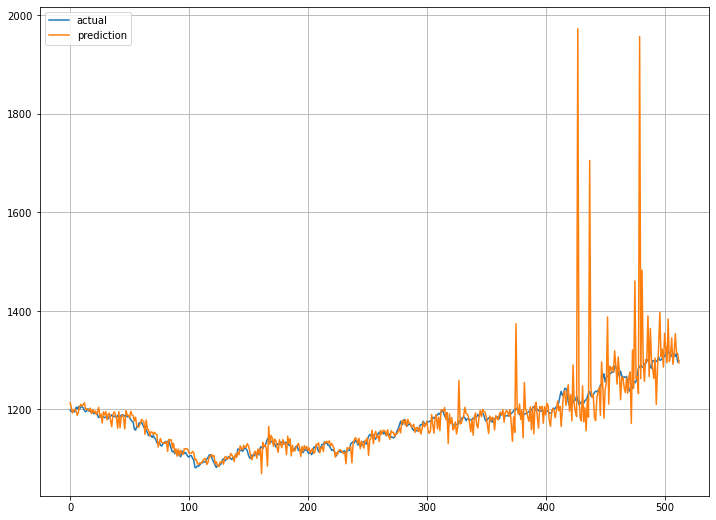

In [ ]:
pred = model.predict(test_feature)

import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.grid()

In [ ]:
import pandas as pd
import numpy as np

df_ex = pd.read_excel('./xlsx/df_ex.xlsx')
df_ex= df_ex.set_index("DateTime")


df_ex_data=df_ex[['대비_swapbasis_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_ndf', '전일종가_ex']]
df_ex_target = df_ex["종가"]

In [ ]:
df_ex_data.feature = df_ex_data.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMadf_ex_dataScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(df_ex_data)
data_scaled = scaler.transform(df_ex_data)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df_ex_data_scaled = pd.DataFrame(data = data_scaled, columns=df_ex_data.feature)

df_ex_data_scaled.index = df_ex_data.index # 인덱스가 달라서 똑같이 설정

# df_ex_data_scaled = df_ex_data_scaled.dropna()
df_ex_data_scaled

,대비_swapbasis_1Y,대비_국고_3Y,대비_국고_5Y,대비_ndf,전일종가_ex
DateTime,,,,,
2012-08-03,0.350055,-0.326540,-1.874896,0.184855,-0.076063
2012-08-06,-0.350125,0.156825,-0.004534,-0.451826,-0.021997
2012-08-07,0.175010,-0.004297,-0.004534,0.019790,-0.123154
2012-08-08,-0.000035,-0.326540,-0.538923,0.055161,-0.126642
2012-08-09,0.700145,0.962434,1.331439,0.102323,-0.135362
...,...,...,...,...,...
2022-08-19,-0.175080,1.123555,2.400217,0.564506,3.220249
2022-08-22,-0.875261,0.801312,1.064244,0.404157,3.310941
2022-08-23,-1.050306,0.156825,-0.806118,0.366427,3.553368


In [ ]:
X_train = df_ex_data_scaled[['대비_swapbasis_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_ndf', '전일종가_ex']][:2457]
X_test = df_ex_data_scaled[['대비_swapbasis_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_ndf', '전일종가_ex']][2457:]
y_train =  df_ex_target[:2457]
y_test =  df_ex_target[2457:]

In [ ]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))

MSE : 46.9369580545994, RMSE :  6.851, MAE: 6.851
Variance score :  0.794


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


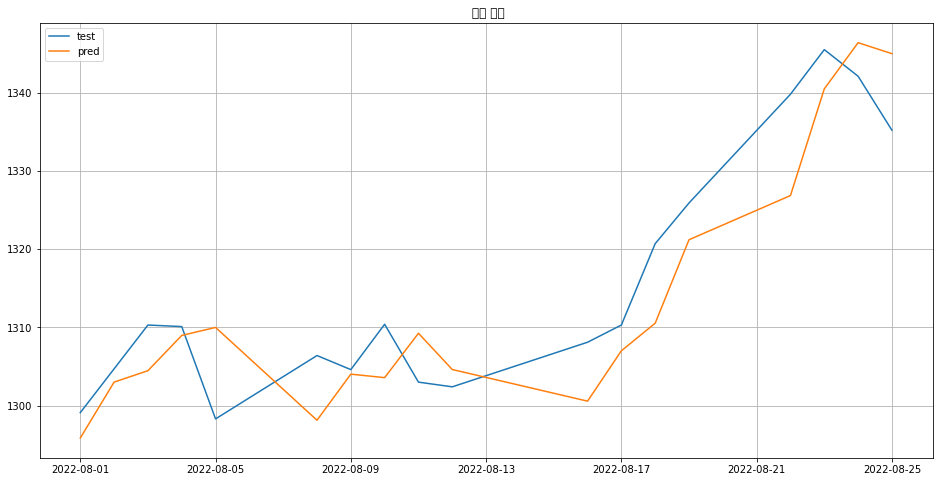

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title(' 환율 예측')
plt.plot(y_test.index, y_test.values, label="test")
plt.plot(y_test.index, y_pred, label="pred")
plt.legend(loc='best')
plt.grid()
plt.show()